<h1>EDA</h1>

<h2>Imports</h2>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h2>Data & Munging</h2>

In [2]:
homelessness = pd.read_csv('../data/homelessness/homelessness_cleaning/2014-2021-PIT-esimates-cleanish.csv')

/home/suma/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (543) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
env = pd.read_csv('../data/weather-population/city_data.csv')

In [4]:
econ2017 = pd.read_csv('../data/housing-cost/cleaned/income_2017.csv')
econ2018 = pd.read_csv('../data/housing-cost/cleaned/income_2018.csv')
econ2019 = pd.read_csv('../data/housing-cost/cleaned/income_2019.csv')

In [5]:
econ2017['year'] = '2017'
econ2017['city, state'] = econ2017['city'] + ', ' + econ2017['state']
econ2018['year'] = '2018'
econ2018['city, state'] = econ2018['city'] + ', ' + econ2018['state']
econ2019['year'] = '2019'
econ2019['city, state'] = econ2019['city'] + ', ' + econ2019['state']

In [6]:
econ2017.columns = econ2017.columns.str.replace('_2017', '')
econ2018.columns = econ2018.columns.str.replace('_2018', '')
econ2019.columns = econ2019.columns.str.replace('_2019', '')

In [7]:
econ = pd.concat([econ2017,econ2018, econ2019])

In [8]:
econ.head()

,city,state,median household income (dollars),monthly cost,owner occupied income,owner occupied cost,renter occupied income,renter occupied cost,year,"city, state"
0,abbeville,la,41082,514,51168,399,23326,643,2017,"abbeville, la"
1,abbeville,sc,22898,549,32998,572,14408,544,2017,"abbeville, sc"
2,abbotsford,wi,42043,608,53068,667,28594,576,2017,"abbotsford, wi"
3,aberdeen,ms,29317,578,44957,622,18199,537,2017,"aberdeen, ms"
4,aberdeen,sd,47342,721,70839,840,30029,641,2017,"aberdeen, sd"


In [9]:
homelessness.head()

,Unnamed: 0,CoC Number,CoC Name,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Sheltered ES Homeless,Sheltered ES Homeless - Under 18,Sheltered ES Homeless - Age 18 to 24,...,Unsheltered Homeless Parenting Youth (Under 25) - Hispanic/Latino,Unsheltered Homeless Parenting Youth (Under 25) - White,Unsheltered Homeless Parenting Youth (Under 25) - Black or African American,Unsheltered Homeless Parenting Youth (Under 25) - Asian,Unsheltered Homeless Parenting Youth (Under 25) - American Indian or Alaska Native,Unsheltered Homeless Parenting Youth (Under 25) - Native Hawaiian or Other Pacific Islander,Unsheltered Homeless Parenting Youth (Under 25) - Multiple Races,CoC Category,City,State
0,0,AK-500,Anchorage CoC,1023.0,188.0,146.0,689.0,665.0,86.0,88.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,anchorage,ak
1,1,AK-501,Alaska Balance of State CoC,761.0,209.0,56.0,496.0,474.0,119.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,anchorage,ak
2,2,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",1329.0,262.0,76.0,991.0,387.0,47.0,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,birmingham,al
3,3,AL-501,Mobile City & County/Baldwin County CoC,598.0,126.0,44.0,428.0,287.0,69.0,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mobile,al
4,4,AL-502,Florence/Northwest Alabama CoC,209.0,50.0,6.0,153.0,38.0,7.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,florence,al


In [10]:
homelessness.columns = homelessness.columns.str.lower()

In [11]:
homelessness['overall homeless'].head()

0    1023.0
1     761.0
2    1329.0
3     598.0
4     209.0
Name: overall homeless, dtype: float64

In [12]:
homelessness.columns = homelessness.columns.str.lower()

In [13]:
env = env.rename(columns={'usps':'state'})

In [14]:
env.dropna(inplace=True)

In [15]:
env.head()

,city,Jan,April,July,Oct,Precip “,precip days,snowfall,rank,state,...,Growth / Decline,Rank_y,Population (2013),Budget,Mayor,Took office,Term ends,Government type,City elections in 2021?,Mayoral election in 2021?
1,Albuquerque,35.7,55.6,78.5,57.3,9.47,60,11,32.0,NM,...,9565.0,32.0,556495.0,"$893,000,000",Tim Keller (D),2017.0,2022.0,Strong mayor,Yes,Yes
4,Atlanta,42.7,61.6,80.0,62.8,50.20,115,2.1,37.0,GA,...,23772.0,40.0,447841.0,"$533,000,000",Keisha Bottoms (D),2018.0,2022.0,Strong mayor,Yes,Yes
6,Austin,50.2,68.3,84.2,70.6,33.65,85,0.9,10.0,TX,...,52202.0,12.0,885400.0,"$3,500,000,000",Stephen Adler (D),2015.0,2023.0,Strong mayor,No,No
7,Baltimore,32.3,53.2,76.5,55.4,41.94,115,21.5,31.0,MD,...,381.0,26.0,622104.0,"$1,648,000,000",Brandon M. Scott (D),2020.0,2024.0,Strong mayor,No,No
8,Baton Rouge,50.1,66.6,81.7,68.1,63.08,110,0.2,108.0,LA,...,565.0,92.0,229426.0,"$830,000,000",Sharon Weston Broome (D),2017.0,2024.0,Strong mayor,Yes,No


In [16]:
env.head()

,city,Jan,April,July,Oct,Precip “,precip days,snowfall,rank,state,...,Growth / Decline,Rank_y,Population (2013),Budget,Mayor,Took office,Term ends,Government type,City elections in 2021?,Mayoral election in 2021?
1,Albuquerque,35.7,55.6,78.5,57.3,9.47,60,11,32.0,NM,...,9565.0,32.0,556495.0,"$893,000,000",Tim Keller (D),2017.0,2022.0,Strong mayor,Yes,Yes
4,Atlanta,42.7,61.6,80.0,62.8,50.20,115,2.1,37.0,GA,...,23772.0,40.0,447841.0,"$533,000,000",Keisha Bottoms (D),2018.0,2022.0,Strong mayor,Yes,Yes
6,Austin,50.2,68.3,84.2,70.6,33.65,85,0.9,10.0,TX,...,52202.0,12.0,885400.0,"$3,500,000,000",Stephen Adler (D),2015.0,2023.0,Strong mayor,No,No
7,Baltimore,32.3,53.2,76.5,55.4,41.94,115,21.5,31.0,MD,...,381.0,26.0,622104.0,"$1,648,000,000",Brandon M. Scott (D),2020.0,2024.0,Strong mayor,No,No
8,Baton Rouge,50.1,66.6,81.7,68.1,63.08,110,0.2,108.0,LA,...,565.0,92.0,229426.0,"$830,000,000",Sharon Weston Broome (D),2017.0,2024.0,Strong mayor,Yes,No


In [17]:
homelessness['state'] = homelessness['state'].str.lower()
homelessness['city'] = homelessness['city'].str.lower()
env['city'] = env['city'].str.lower()
env['state'] = env['state'].str.lower()

In [18]:
homelessness['overall homeless'].isnull().sum()

7

In [19]:
df = pd.merge(env, homelessness, on=['city', 'state'], how='left')
df.shape

(352, 571)

In [20]:
df['overall homeless'].isnull().sum()

2

In [21]:
env['city']

1        albuquerque
4            atlanta
6             austin
7          baltimore
8        baton rouge
10        birmingham
12             boise
13            boston
15           buffalo
21         charlotte
23           chicago
24         cleveland
26          columbus
27          columbus
30            denver
32           detroit
35           el paso
42          honolulu
43           houston
44      indianapolis
46      jacksonville
51         las vegas
54        long beach
55       los angeles
57           madison
58           memphis
59             miami
60         milwaukee
66            newark
67       new orleans
68          new york
69           norfolk
72             omaha
73      philadelphia
74           phoenix
75        pittsburgh
76          portland
77          portland
79           raleigh
80              reno
83        sacramento
85       san antonio
86         san diego
87     san francisco
94         st. louis
95             tampa
96            toledo
97           

In [22]:
econ2017.columns=econ2017.columns.str.lower()

In [23]:
df.shape

(352, 571)

In [24]:
econ2017.columns

Index(['city', 'state', 'median household income (dollars)', 'monthly cost',
       'owner occupied income', 'owner occupied cost',
       'renter occupied income', 'renter occupied cost', 'year',
       'city, state'],
      dtype='object')

In [25]:
df.columns

Index(['city', 'Jan', 'April', 'July', 'Oct ', 'Precip “', 'precip days',
       'snowfall', 'rank', 'state',
       ...
       'unsheltered homeless parenting youth (under 25) - gender non-conforming',
       'unsheltered homeless parenting youth (under 25) - non-hispanic/non-latino',
       'unsheltered homeless parenting youth (under 25) - hispanic/latino',
       'unsheltered homeless parenting youth (under 25) - white',
       'unsheltered homeless parenting youth (under 25) - black or african american',
       'unsheltered homeless parenting youth (under 25) - asian',
       'unsheltered homeless parenting youth (under 25) - american indian or alaska native',
       'unsheltered homeless parenting youth (under 25) - native hawaiian or other pacific islander',
       'unsheltered homeless parenting youth (under 25) - multiple races',
       'coc category'],
      dtype='object', length=571)

In [26]:
df = pd.merge(df, econ2017, on=['city', 'state'], how='left')

In [27]:
df.shape

(352, 579)

In [28]:
df.dropna().shape

(27, 579)

In [29]:
df = df.drop(columns= ['Mayor', 'City elections in 2021?', 'coc number', 'coc name', 'coc category', 'year_y', 'Mayoral election in 2021?', 'city, state'])


In [30]:
df.select_dtypes(object).head(2)

,city,snowfall,state,Budget,Government type
0,albuquerque,11,nm,"$893,000,000",Strong mayor
1,albuquerque,11,nm,"$893,000,000",Strong mayor


In [31]:
df.columns = df.columns.str.lower()

In [32]:
df['snowfall'] = df['snowfall'].map({'trace': 0})
df['snowfall'] = df['snowfall'].astype(float)

In [33]:
df['budget'] = df['budget'].str.replace('$', '')
df['budget'] = df['budget'].str.replace(',', '')

<ipython-input-33-480cb301328a>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['budget'] = df['budget'].str.replace('$', '')


In [34]:
df.select_dtypes(object).head(2)

,city,state,budget,government type
0,albuquerque,nm,893000000,Strong mayor
1,albuquerque,nm,893000000,Strong mayor


In [35]:
df['budget'] = df['budget'].astype(int) / 1_000_000

In [36]:
df['budget'] = df['budget'].astype(int)

In [37]:

df['budget'].head(3)

0    893
1    893
2    893
Name: budget, dtype: int64

In [38]:
df.select_dtypes(np.number).isnull().sum()

jan                         0
april                       0
july                        0
oct                         0
precip “                    0
                         ... 
monthly cost              163
owner occupied income     163
owner occupied cost       163
renter occupied income    163
renter occupied cost      163
Length: 568, dtype: int64

In [39]:
for ele in df.columns:
        print(ele)

city
jan
april
july
oct 
precip “
precip days
snowfall
rank
state
pop2021
pop2010
growth
density
aland_sqmi
2010 population
2012 population
growth / decline
rank_y
population (2013)
budget
took office
term ends
government type
unnamed: 0
overall homeless
overall homeless - under 18
overall homeless - age 18 to 24
overall homeless - over 24
sheltered es homeless
sheltered es homeless - under 18
sheltered es homeless - age 18 to 24
sheltered es homeless - over 24
sheltered th homeless
sheltered th homeless - under 18
sheltered th homeless - age 18 to 24
sheltered th homeless - over 24
sheltered sh homeless
sheltered sh homeless - age 18 to 24
sheltered sh homeless - over 24
sheltered total homeless
sheltered total homeless - under 18
sheltered total homeless - age 18 to 24
sheltered total homeless - over 24
unsheltered homeless
unsheltered homeless - under 18
unsheltered homeless - age 18 to 24
unsheltered homeless - over 24
overall homeless individuals
overall homeless individuals - und

In [40]:
df2 = pd.merge(env, homelessness[['city','state','overall homeless', 'year']], on=['city', 'state'], how='left')
df2 = pd.merge(df2, econ2017[['city','state','median household income (dollars)']], on=['city', 'state'], how='left')

df2['snowfall'] = np.array([snow if snow != 'trace' else 0 for snow in df2['snowfall']]).astype(float)

df2 = df2.drop(columns= ['Mayor', 'City elections in 2021?', 'Mayoral election in 2021?'])


In [41]:
df2.isnull().mean()

city                                 0.000000
Jan                                  0.000000
April                                0.000000
July                                 0.000000
Oct                                  0.000000
Precip “                             0.000000
precip days                          0.000000
snowfall                             0.000000
rank                                 0.000000
state                                0.000000
pop2021                              0.000000
pop2010                              0.000000
growth                               0.000000
density                              0.000000
aland_sqmi                           0.000000
2010 population                      0.000000
2012 population                      0.000000
Growth / Decline                     0.000000
Rank_y                               0.000000
Population (2013)                    0.000000
Budget                               0.000000
Took office                       

In [42]:
df2 = df2.dropna()

<h2>Ploting</h2>

In [43]:
df2.columns = df2.columns.str.lower()

In [44]:
df2['budget'] = df2['budget'].str.replace('$', '')
df2['budget'] = df2['budget'].str.replace(',', '')
df2['budget'] = df2['budget'].astype(int) // 1_000_000

<ipython-input-44-cdbaf95814b3>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df2['budget'] = df2['budget'].str.replace('$', '')


In [45]:
corr2

NameError: name 'corr2' is not defined

<AxesSubplot:>

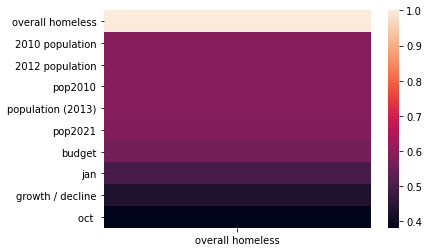

In [46]:
sns.heatmap(df2.corr()[['overall homeless']].sort_values(by='overall homeless', ascending = False).head(10))

<AxesSubplot:>

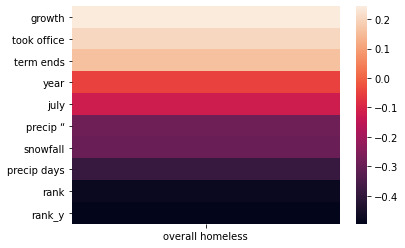

In [47]:
sns.heatmap(df2.corr()[['overall homeless']].sort_values(by='overall homeless', ascending = False).tail(10))

<AxesSubplot:>

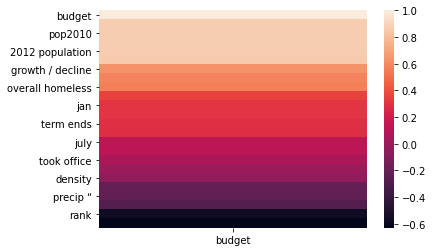

In [48]:
sns.heatmap(df2.corr()[['budget']].sort_values(by='budget', ascending = False))

In [49]:
df2['budget/pop'] = df2['budget'] / df2['pop2021']

<AxesSubplot:>

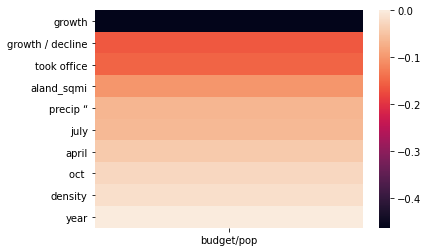

In [50]:
sns.heatmap(df2.corr()[['budget/pop']].sort_values(by='budget/pop', ascending = True).head(10))

In [51]:
df2['budget/homeless'] = df2['budget'] / df2['overall homeless']

<AxesSubplot:>

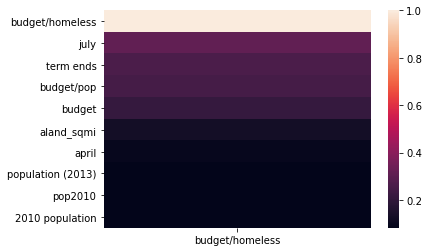

In [52]:
sns.heatmap(df2.corr()[['budget/homeless']].sort_values(by='budget/homeless', ascending = False).head(10))

<AxesSubplot:>

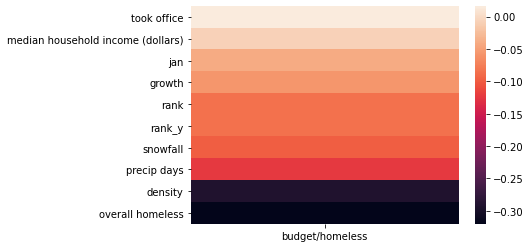

In [53]:
sns.heatmap(df2.corr()[['budget/homeless']].sort_values(by='budget/homeless', ascending = False).tail(10))

<AxesSubplot:>

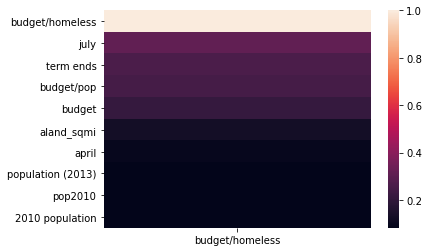

In [54]:
sns.heatmap(df2.corr()[['budget/homeless']].sort_values(by='budget/homeless', ascending = False).head(10))

In [55]:
df2.isna().sum()

city                                 0
jan                                  0
april                                0
july                                 0
oct                                  0
precip “                             0
precip days                          0
snowfall                             0
rank                                 0
state                                0
pop2021                              0
pop2010                              0
growth                               0
density                              0
aland_sqmi                           0
2010 population                      0
2012 population                      0
growth / decline                     0
rank_y                               0
population (2013)                    0
budget                               0
took office                          0
term ends                            0
government type                      0
overall homeless                     0
year                     

In [56]:
df2.city

0      albuquerque
1      albuquerque
2      albuquerque
3      albuquerque
4      albuquerque
          ...     
347        wichita
348        wichita
349        wichita
350        wichita
351        wichita
Name: city, Length: 189, dtype: object

In [57]:
df2.select_dtypes(np.number).columns

Index(['jan', 'april', 'july', 'oct ', 'precip “', 'precip days', 'snowfall',
       'rank', 'pop2021', 'pop2010', 'growth', 'density', 'aland_sqmi',
       '2010 population', '2012 population', 'growth / decline', 'rank_y',
       'population (2013)', 'budget', 'took office', 'term ends',
       'overall homeless', 'year', 'median household income (dollars)',
       'budget/pop', 'budget/homeless'],
      dtype='object')

In [58]:
from sklearn.preprocessing import StandardScaler
df2['%homeless'] = df2['overall homeless'] / df2['pop2021']
sc = StandardScaler()
s = sc.fit_transform(df2.select_dtypes(np.number))

In [59]:

dfsc = pd.DataFrame(s, columns =df2.select_dtypes(np.number).columns )

In [60]:
dfsc['city'] = df2['city']

In [61]:
dfsc['city'].isnull().sum()

84

In [62]:
dfsc = dfsc.dropna()

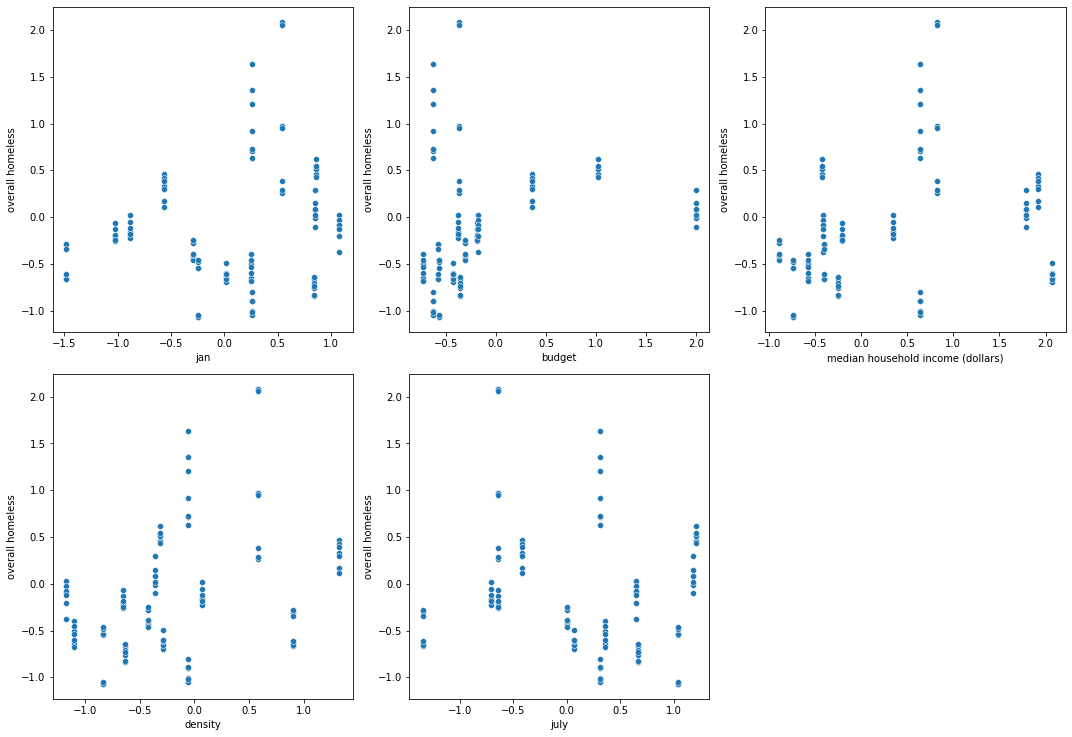

In [63]:
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.scatterplot(x = 'jan' , y ='overall homeless', data =dfsc)

plt.subplot(3,3,2)
sns.scatterplot(x = 'budget' , y ='overall homeless', data =dfsc)

plt.subplot(3,3,3)
sns.scatterplot(x = 'median household income (dollars)' , y ='overall homeless', data =dfsc)


plt.subplot(3,3,4)
sns.scatterplot(x = 'density' , y ='overall homeless', data =dfsc)

plt.subplot(3,3,5)
sns.scatterplot(x = 'july' , y ='overall homeless', data =dfsc)

plt.tight_layout();

In [64]:
from sklearn.cluster import KMeans

scores= []
for k in range(1, 20):
    km = KMeans(k)
    s = km.fit(dfsc.select_dtypes(np.number))
    scores.append(s.score(dfsc.select_dtypes(np.number)))

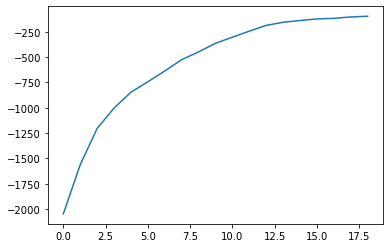

In [65]:
plt.plot(scores )

In [66]:
km = KMeans(7)

In [67]:
dfsc['group'] = km.fit_predict(dfsc.select_dtypes(np.number))

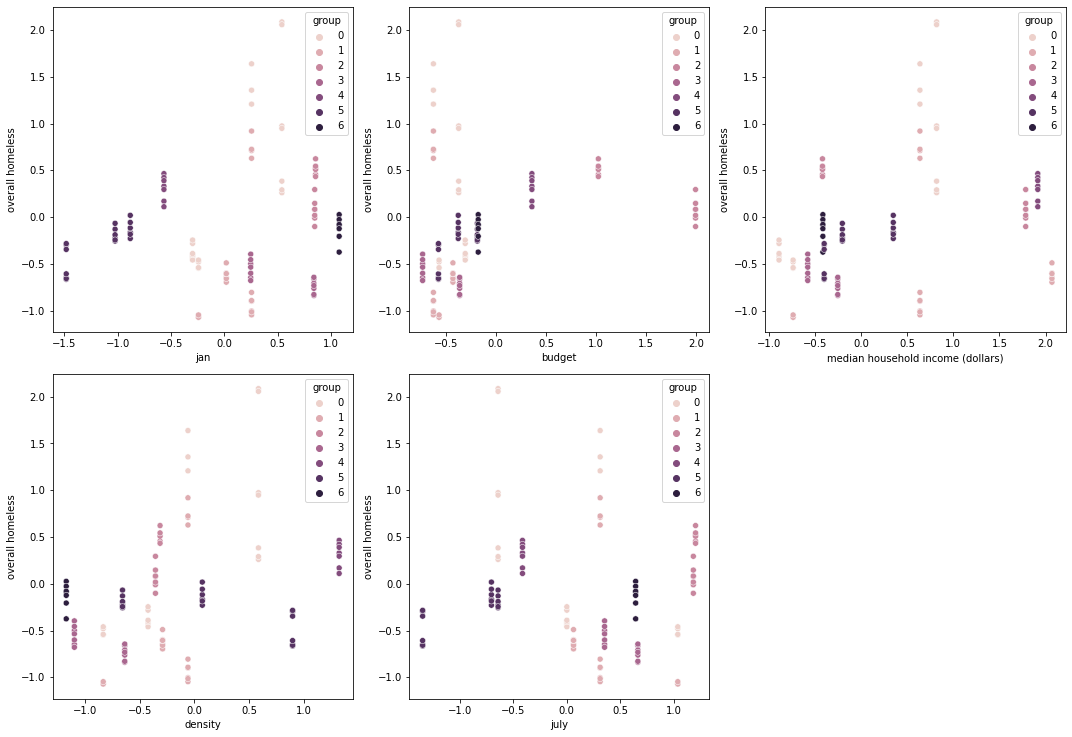

In [68]:
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.scatterplot(x = 'jan' , y ='overall homeless', data =dfsc, hue = 'group')

plt.subplot(3,3,2)
sns.scatterplot(x = 'budget' , y ='overall homeless', data =dfsc, hue = 'group')

plt.subplot(3,3,3)
sns.scatterplot(x = 'median household income (dollars)' , y ='overall homeless', data =dfsc, hue = 'group')


plt.subplot(3,3,4)
sns.scatterplot(x = 'density' , y ='overall homeless',data =dfsc, hue = 'group')

plt.subplot(3,3,5)
sns.scatterplot(x = 'july' , y ='overall homeless', data =dfsc, hue = 'group')

plt.tight_layout();

In [69]:
dfsc.groupby('group').mean()   

,jan,april,july,oct,precip “,precip days,snowfall,rank,pop2021,pop2010,...,population (2013),budget,took office,term ends,overall homeless,year,median household income (dollars),budget/pop,budget/homeless,%homeless
group,,,,,,,,,,,,,,,,,,,,,
0,0.070805,-0.020084,0.027614,-0.015795,-1.033437,-1.130962,-0.490935,-0.170439,-0.307547,-0.314551,...,-0.316567,-0.422777,0.220417,0.187583,0.310986,0.000000,-0.071796,-0.429393,-0.579927,0.782975
1,0.105037,0.232742,0.331374,0.032403,0.538143,0.094118,-0.527974,-0.085672,-0.352319,-0.455812,...,-0.432529,-0.550389,0.564421,-0.542470,-0.527215,0.285714,0.919210,-0.660401,0.682287,-0.552355
2,0.851561,1.169397,1.190874,1.161387,-0.406773,-0.793833,-0.712963,-1.149334,1.368977,1.143361,...,1.224002,1.507939,0.071349,0.141955,0.293577,0.000000,0.683710,0.670848,0.700183,-0.658345
3,0.543471,0.628854,0.507416,0.501568,1.371074,0.178207,-0.710790,2.393758,-0.955255,-0.934947,...,-0.931938,-0.546253,0.312152,-0.337142,-0.642608,0.000000,-0.414137,1.129529,-0.039650,0.497583
4,-0.566439,-0.662443,-0.414217,-0.792448,0.202624,0.226810,0.186529,-0.379096,-0.175920,0.045103,...,0.002017,0.359814,1.034560,1.100149,0.311433,0.000000,1.915820,1.078595,-0.216090,0.541428
5,-1.129953,-1.078862,-0.897470,-1.027336,-0.068219,0.691229,0.687695,-0.755657,0.296877,0.326531,...,0.311368,-0.377973,-0.972130,0.780751,-0.272591,0.000000,-0.083896,-0.927677,-0.395506,-0.670935
6,1.076703,0.947174,0.642036,1.001237,0.934886,0.259211,-0.747726,-0.995286,0.582551,0.540437,...,0.515099,-0.176331,-0.169454,0.141955,-0.125160,0.000000,-0.412913,-0.818681,-0.316701,-0.675783


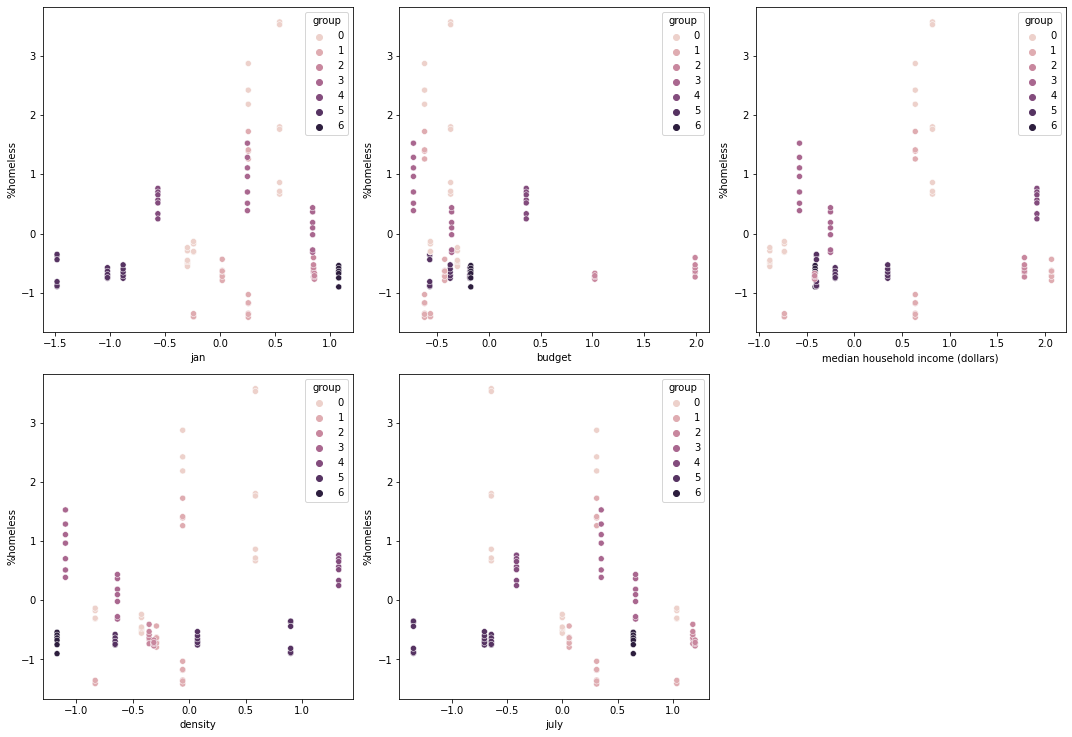

In [70]:
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.scatterplot(x = 'jan' , y ='%homeless', data =dfsc, hue = 'group')

plt.subplot(3,3,2)
sns.scatterplot(x = 'budget' , y ='%homeless', data =dfsc, hue = 'group')

plt.subplot(3,3,3)
sns.scatterplot(x = 'median household income (dollars)' , y ='%homeless', data =dfsc, hue = 'group')


plt.subplot(3,3,4)
sns.scatterplot(x = 'density' , y ='%homeless',data =dfsc, hue = 'group')

plt.subplot(3,3,5)
sns.scatterplot(x = 'july' , y ='%homeless', data =dfsc, hue = 'group')

plt.tight_layout();

In [89]:
dfsc[dfsc['group'] == 6]['city'].unique()

array(['columbus'], dtype=object)

In [72]:
dfsc[dfsc['group'] == 2]['city'].unique

<bound method Series.unique of 21           austin
22           austin
23           austin
24           austin
25           austin
26           austin
27           austin
147    jacksonville
148    jacksonville
149    jacksonville
150    jacksonville
151    jacksonville
152    jacksonville
153    jacksonville
Name: city, dtype: object>

In [91]:
dfsc[dfsc['group'] == 0]['city'].unique


<bound method Series.unique of 0       albuquerque
1       albuquerque
2       albuquerque
3       albuquerque
4       albuquerque
5       albuquerque
6       albuquerque
7           atlanta
9           atlanta
11          atlanta
140    indianapolis
141    indianapolis
142    indianapolis
143    indianapolis
144    indianapolis
145    indianapolis
146    indianapolis
175         madison
177         madison
179         madison
181         madison
Name: city, dtype: object>

In [547]:
dfsc[dfsc['group'] == 6]['city'].unique

<bound method Series.unique of 63       buffalo
64       buffalo
65       buffalo
66       buffalo
67       buffalo
68       buffalo
69       buffalo
84     cleveland
85     cleveland
86     cleveland
87     cleveland
88     cleveland
89     cleveland
90     cleveland
112      detroit
113      detroit
114      detroit
115      detroit
116      detroit
117      detroit
118      detroit
Name: city, dtype: object>